<a href="https://colab.research.google.com/github/Jair2472/Modelos_de_Prediccion/blob/main/LDD/Main_principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime

# Se carga el archivo CSV con nuestro dataset
df = pd.read_csv('/content/25_BD.csv')

# Imprimir los nombres de las columnas
print("Nombres de las columnas:", df.columns)

# Convertir la columna 'Date' de números de serie a formato de fecha
df['Date'] = pd.to_datetime(df['Date'], origin='1899-12-30', unit='D').dt.strftime('%d/%m/%Y')

# Definir los tipos de datos de cada columna
dtype_dict = {
    'FiscalYear': 'int64',
    'Period': 'int64',
    'Date': 'datetime64[ns]',
    'Depto': 'int64',
    'VentasAcum': 'float64',
    'CostosAcum': 'float64',
    'IngresosAcum': 'float64',
    'MargenFinal%': 'float64',
    'Ajuste': 'float64'
}

# Aplicar los tipos de datos definidos
df = df.astype(dtype_dict)

# Mostrar las primeras filas del DataFrame y los tipos de datos
print(df.head())
print(df.dtypes)

Nombres de las columnas: Index(['FiscalYear', 'Period', 'Date', 'Depto', 'VentasAcum', 'CostosAcum',
       'IngresosAcum', 'MargenFinal%', 'Ajuste'],
      dtype='object')
   FiscalYear  Period       Date  Depto    VentasAcum    CostosAcum  \
0        2019       1 2018-10-29    123   25582.84437   6224.742985   
1        2019       1 2018-10-30    123   52294.89596  12551.411640   
2        2019       1 2018-10-31    123   75989.98114  17472.170950   
3        2019       1 2018-01-11    123  101996.77740  23246.260370   
4        2019       1 2018-02-11    123  130852.26790  29349.922940   

   IngresosAcum  MargenFinal%  Ajuste  
0   -178.195595      0.200765     0.0  
1   -211.506122      0.200765     0.0  
2   -445.821574      0.200765     0.0  
3   -820.099531      0.200765     0.0  
4  -1185.005452      0.200765     0.0  
FiscalYear               int64
Period                   int64
Date            datetime64[ns]
Depto                    int64
VentasAcum             float64
Costo

In [ ]:
#Mostrar valores en cero de las columnas 'VentasAcum', 'CostosAcum', 'IngresosAcum'
print("\nValores en cero:")
print("VentasAcum:", (df['VentasAcum'] == 0).sum())
print("CostosAcum:", (df['CostosAcum'] == 0).sum())
print("IngresosAcum:", (df['IngresosAcum'] == 0).sum())

#Mostrar en que posicion del dataset se encuentran los valores en cero
print("\nPosiciones de valores en cero:")
print("VentasAcum:", df.index[df['VentasAcum'] == 0].tolist())
print("CostosAcum:", df.index[df['CostosAcum'] == 0].tolist())
print("IngresosAcum:", df.index[df['IngresosAcum'] == 0].tolist())





Valores en cero:
VentasAcum: 0
CostosAcum: 0
IngresosAcum: 4459

Posiciones de valores en cero:
VentasAcum: []
CostosAcum: []
IngresosAcum: [59, 357, 424, 455, 650, 651, 672, 949, 950, 951, 1028, 1155, 1520, 1755, 1756, 1885, 2250, 2365, 2417, 2646, 2841, 2842, 2863, 3010, 3089, 3140, 3142, 3219, 3346, 3946, 3947, 4076, 4382, 4383, 4384, 4385, 4387, 4388, 4389, 4391, 4392, 4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4408, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4424, 4426, 4428, 4429, 4430, 4432, 4433, 4434, 4436, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4455, 4456, 4457, 4458, 4459, 4460, 4464, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4491, 4492, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4510, 4511, 4512, 4513, 4514, 4515, 4516,

In [ ]:
#Cambiar los valores de cero de las columnas 'VentasAcum', 'CostosAcum', 'IngresosAcum' a NaN por el dia anterior

# Ordenar por fecha
df = df.sort_values(by="Date")

# Columnas objetivo
columnas_a_corregir = ['VentasAcum', "CostosAcum", "IngresosAcum"]

# Reemplazar valores 0 por el valor del día anterior en cada columna.
for col in columnas_a_corregir:
    df[col] = df[col].mask(df[col] == 0).ffill()
    df[col] = df[col].fillna(df[col])

#corroborar que la columna 'VentasAcum', 'CostosAcum', 'IngresosAcum' no tiene valores cero
if (df['VentasAcum'] == 0).any():
    print("Advertencia: La columna 'VentasAcum' aún contiene valores cero.")
else:
    print("La columna 'VentasAcum' no contiene valores cero.")

if (df['CostosAcum'] == 0).any():
    print("Advertencia: La columna 'CostosAcum' aún contiene valores cero.")
else:
    print("La columna 'CostosAcum' no contiene valores cero.")

if (df['IngresosAcum'] == 0).any():
    print("Advertencia: La columna 'IngresosAcum' aún contiene valores cero.")
    print(f"cantidad de valores cero en 'IngresosAcum': {(df['IngresosAcum'] == 0).sum()}")
else:
    print("La columna 'IngresosAcum' no contiene valores cero.")

# revisar los valores NaN en las columnas 'VentasAcum', 'CostosAcum', 'IngresosAcum'
if df['VentasAcum'].isna().any():
    print("Advertencia: La columna 'VentasAcum' contiene valores NaN.")
if df['CostosAcum'].isna().any():
    print("Advertencia: La columna 'CostosAcum' contiene valores NaN.")
if df['IngresosAcum'].isna().any():
    print("Advertencia: La columna 'IngresosAcum' contiene valores NaN.")
    print(df[df['IngresosAcum'].isna()])
    #A los valores NaN  de la columna 'IngresosAcum' se les asigna el valor cero
    df['IngresosAcum'] = df['IngresosAcum'].fillna(0)
    #guardar los valores NaN en un archivo CSV
    df[df['IngresosAcum'].isna()].to_csv('valores_nan_ingresos.csv', index=False)


# Mostrar el DataFrame corregido
print("DataFrame corregido:")
print(df)

# Guardar el DataFrame después de la corrección
df.to_csv('dataset_corregido.csv', index=False)

#imprimir los nan de las columnas 'VentasAcum', 'CostosAcum', 'IngresosAcum'
print("\nValores NaN:")
print("VentasAcum:", df['VentasAcum'].isna().sum())
print("CostosAcum:", df['CostosAcum'].isna().sum())
print("IngresosAcum:", df['IngresosAcum'].isna().sum())


La columna 'VentasAcum' no contiene valores cero.
La columna 'CostosAcum' no contiene valores cero.
La columna 'IngresosAcum' no contiene valores cero.
Advertencia: La columna 'IngresosAcum' contiene valores NaN.
      FiscalYear  Period       Date  Depto  VentasAcum   CostosAcum  \
4385        2019       1 2018-01-11    276  2571.21399  1856.090257   

      IngresosAcum  MargenFinal%  Ajuste  
4385           NaN      0.205267     0.0  
DataFrame corregido:
       FiscalYear  Period       Date  Depto    VentasAcum     CostosAcum  \
4385         2019       1 2018-01-11    276    2571.21399    1856.090257   
10958        2019       1 2018-01-11    429   50624.67489   42040.147370   
3            2019       1 2018-01-11    123  101996.77740   23246.260370   
6576         2019       1 2018-01-11    323   13950.35976   11720.840580   
13149        2019       1 2018-01-11    453   38391.61263   34423.205580   
...           ...     ...        ...    ...           ...            ...   
10939

In [ ]:
# Añadir una columna NameDept para identificar el nombre del departamento
df['depto'] = df['Depto']

# Definir un diccionario para mapear los códigos de departamento a nombres
departamento_mapping = {
    1877: 'CARNICERIA',
    2277: 'SALUD',
    2748: 'ROPA',
    3298: 'HOGAR',
    3787: 'COMIDAS',
    4459: 'LACTEOS',
    4554: 'ABARROTES',
    5051: 'FLORES'
}


# Mapear los códigos de departamento a nombres
df['NameDept'] = df['depto'].map(departamento_mapping)
# Verificar si hay códigos de departamento que no están en el diccionario
missing_departments = df[~df['depto'].isin(departamento_mapping.keys())]['depto'].unique()
if len(missing_departments) > 0:
    print("Advertencia: Hay códigos de departamento que no están en el diccionario:", missing_departments)
# Mostrar el DataFrame con la nueva columna
print("DataFrame con la columna 'NameDept':")
print(df[['depto', 'NameDept']].head())
#Eliminar la columna 'depto' ya que no es necesaria
df.drop(columns=['depto'], inplace=True)
# Guardar el DataFrame con la nueva columna
df.to_csv('dataset_con_nombre_depto.csv', index=False)


DataFrame con la columna 'NameDept':
       depto    NameDept
4385     276        ROPA
10958    429     LACTEOS
3        123  CARNICERIA
6576     323       HOGAR
13149    453   ABARROTES


In [ ]:
# Preprocesamiento inicial
df.columns = df.columns.str.strip()  # quitar espacios en columnas
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfPeriod'] = df.groupby(['FiscalYear', 'Period', 'Depto']).cumcount() + 1

display(df.head())

,FiscalYear,Period,Date,Depto,VentasAcum,CostosAcum,IngresosAcum,MargenFinal%,Ajuste,NameDept,DayOfPeriod
4385,2019,1,2018-01-11,276,2571.21399,1856.090257,0.000000,0.205267,0.0,ROPA,1
10958,2019,1,2018-01-11,429,50624.67489,42040.147370,-729.070124,0.181736,0.0,LACTEOS,1
3,2019,1,2018-01-11,123,101996.77740,23246.260370,-820.099531,0.200765,0.0,CARNICERIA,1
6576,2019,1,2018-01-11,323,13950.35976,11720.840580,-60.290952,0.275267,0.0,HOGAR,1
13149,2019,1,2018-01-11,453,38391.61263,34423.205580,-890.238521,0.139207,0.0,ABARROTES,1


# SEPARACIÓN POR DEPARTAMENTOS

In [ ]:
# Generar un dataset por departamento y guardarlo como archivo CSV
for dept_name in df['NameDept'].unique():
    df_dept = df[df['NameDept'] == dept_name]
    filename = f"dataset_{dept_name.lower()}.csv"
    df_dept.to_csv(filename, index=False)
    print(f"Archivo guardado: {filename} ({len(df_dept)} filas)")

Archivo guardado: dataset_ropa.csv (2191 filas)
Archivo guardado: dataset_lacteos.csv (2191 filas)
Archivo guardado: dataset_carniceria.csv (2191 filas)
Archivo guardado: dataset_hogar.csv (2191 filas)
Archivo guardado: dataset_abarrotes.csv (2191 filas)
Archivo guardado: dataset_salud.csv (2191 filas)
Archivo guardado: dataset_comidas.csv (2191 filas)
Archivo guardado: dataset_flores.csv (2191 filas)


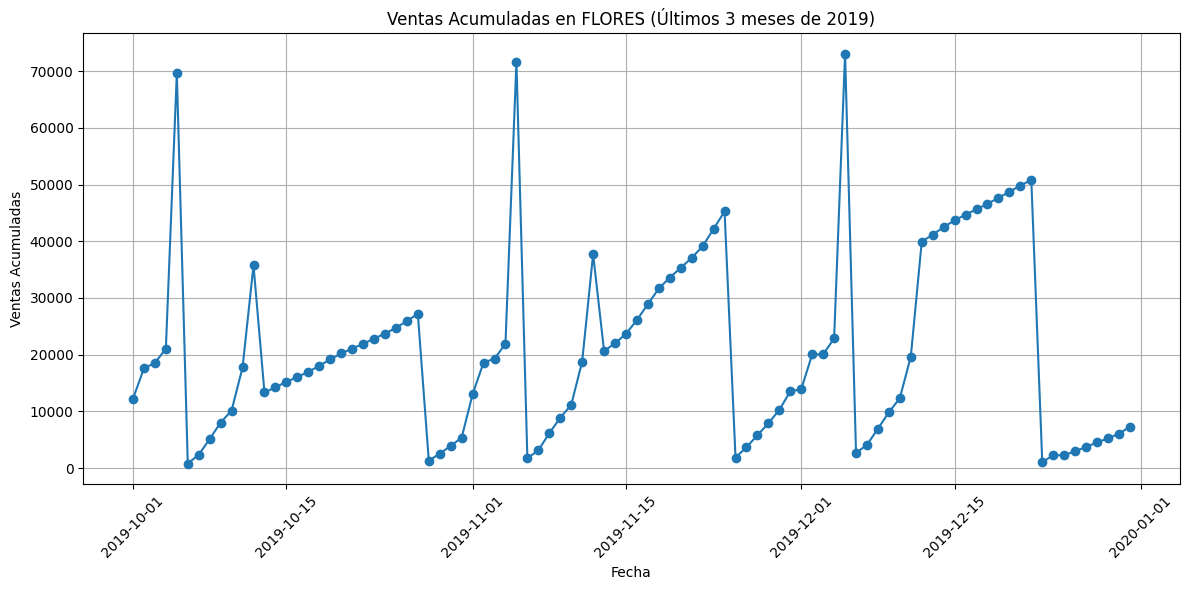

In [ ]:
#graficar los datos de un departamento específico
import matplotlib.pyplot as plt

# Filtrar los datos para un departamento específico y los últimos 3 meses de 2019
dept_name = "FLORES"  # Cambiar por el nombre del departamento deseado
start_date = pd.Timestamp("2019-10-01")
end_date = pd.Timestamp("2019-12-31")
df_dept = df[
    (df['NameDept'] == dept_name) &
    (df['Date'] >= start_date) &
    (df['Date'] <= end_date)
]

# Graficar las ventas acumuladas a lo largo del tiempo para los últimos 3 meses de 2019
plt.figure(figsize=(12, 6))
plt.plot(df_dept['Date'], df_dept['VentasAcum'], marker='o', linestyle='-')
plt.title(f'Ventas Acumuladas en {dept_name} (Últimos 3 meses de 2019)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Acumuladas')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



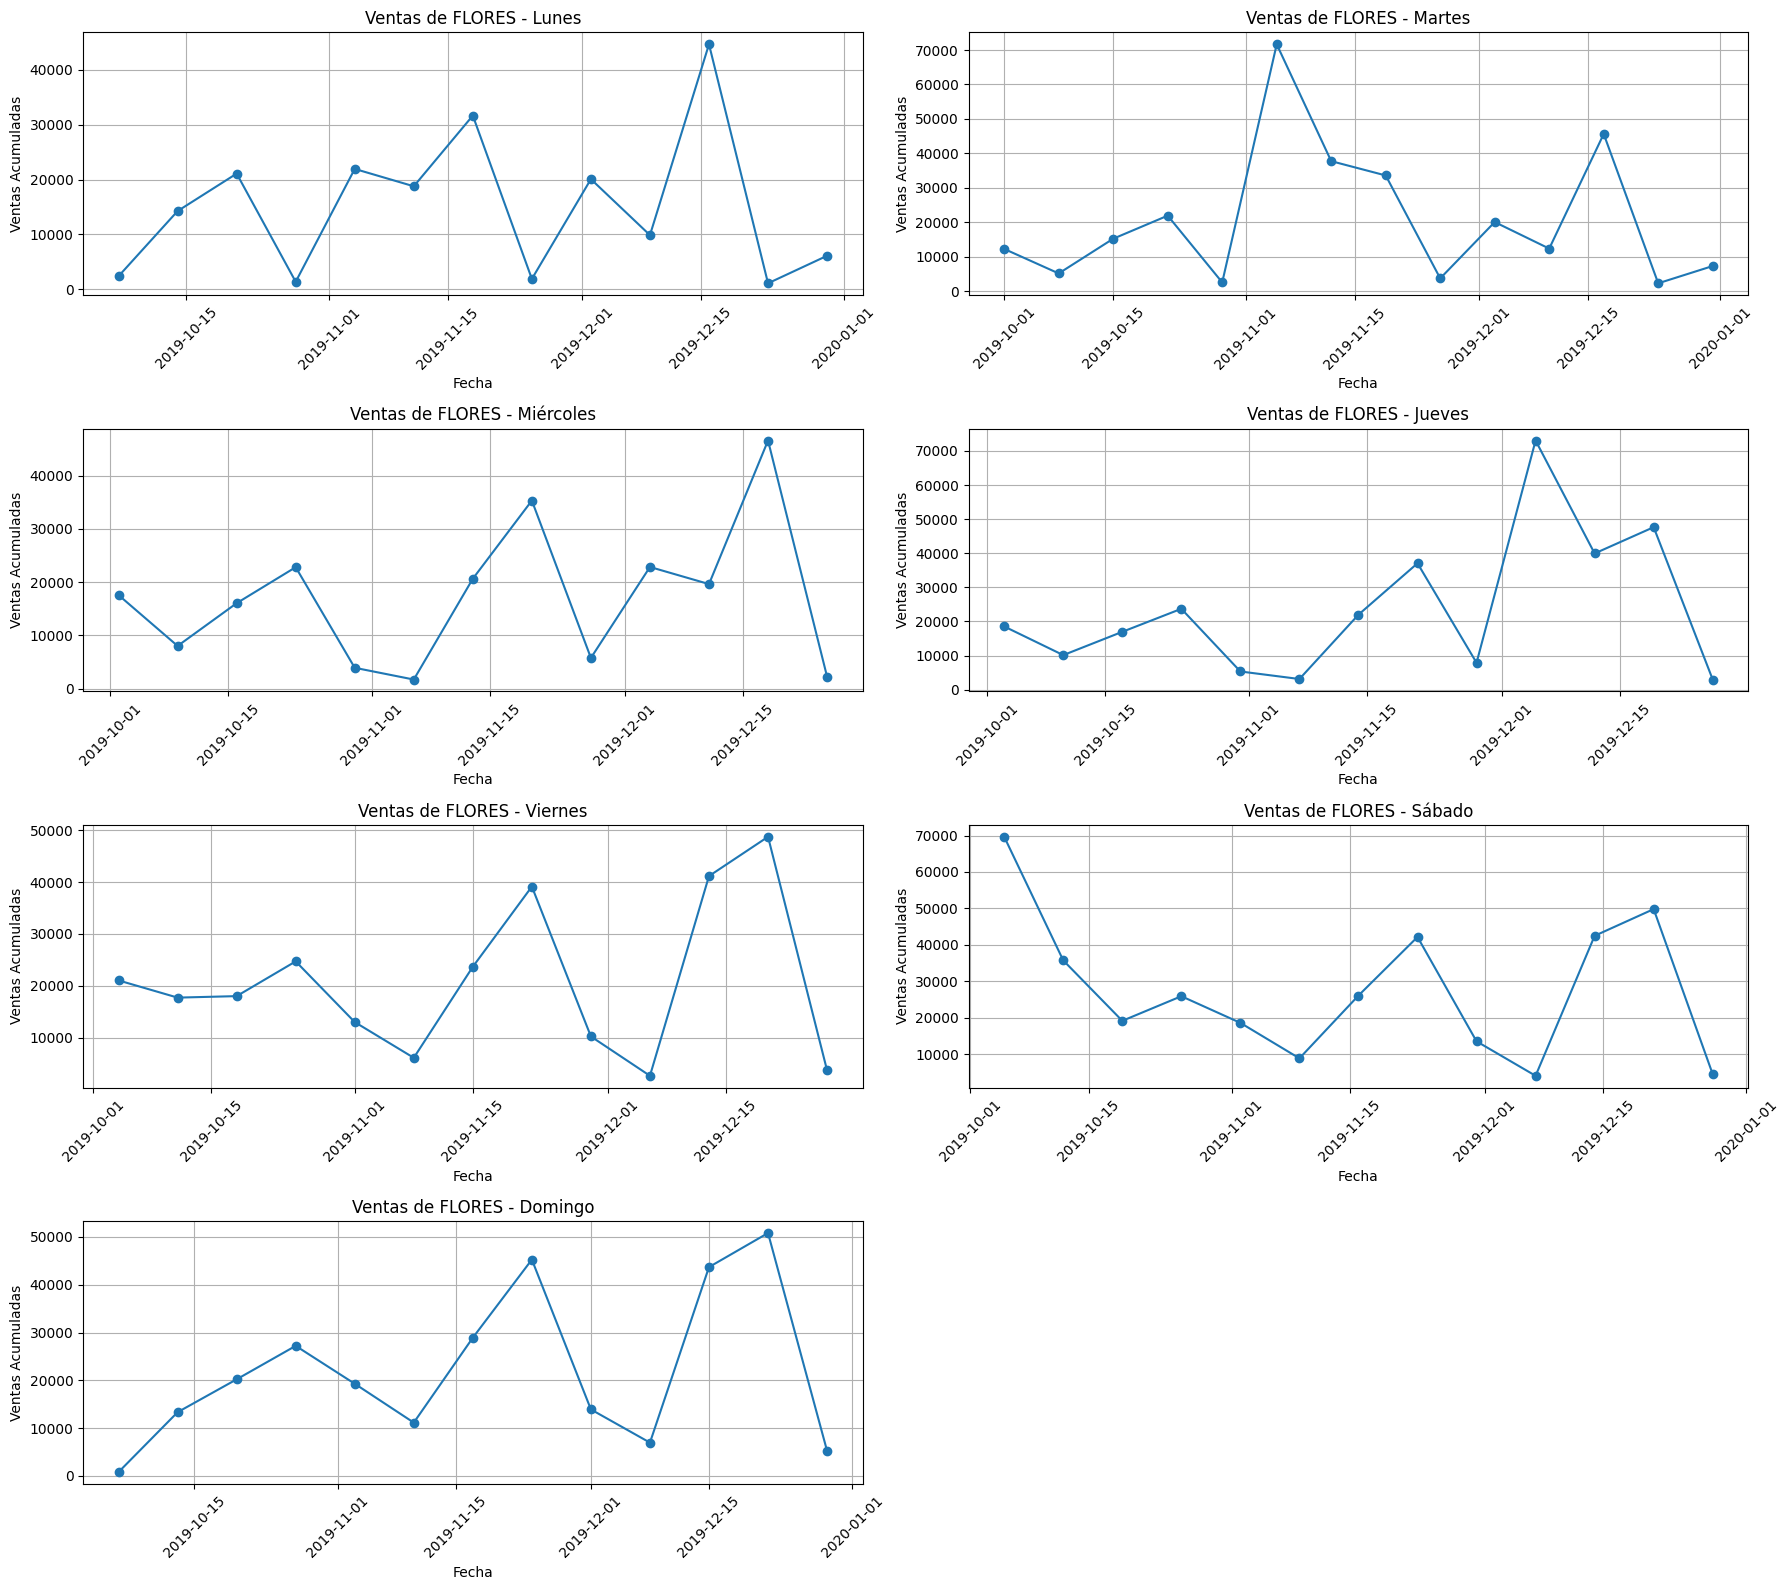

In [ ]:
#graficar los datos de un departamento específico
import matplotlib.pyplot as plt

# Filtrar los datos para el departamento de FLORES y los últimos 3 meses de 2019
dept_name = "FLORES"
start_date = pd.Timestamp("2019-10-01")
end_date = pd.Timestamp("2019-12-31")
df_flores = df[
    (df['NameDept'] == dept_name) &
    (df['Date'] >= start_date) &
    (df['Date'] <= end_date)
].copy()

# Agregar columna con el nombre del día de la semana (en español)
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df_flores['DiaSemana'] = df_flores['Date'].dt.dayofweek.map(lambda x: dias_semana[x])

# Generar una gráfica para cada día de la semana
fig, axs = plt.subplots(4, 2, figsize=(18, 16))
axs = axs.flatten()

for i, dia in enumerate(dias_semana):
    df_dia = df_flores[df_flores['DiaSemana'] == dia]
    axs[i].plot(df_dia['Date'], df_dia['VentasAcum'], marker='o', linestyle='-')
    axs[i].set_title(f'Ventas de FLORES - {dia}')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Ventas Acumuladas')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid()

# Eliminar el subplot vacío (posición 7)
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()